In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
my_graph = nx.Graph()
my_graph.add_node(1)
my_graph.add_nodes_from([2, 3])
my_graph.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])
print(my_graph)

Graph with 5 nodes and 0 edges


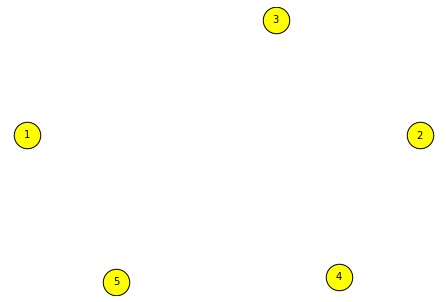

In [6]:
draw_options = {
    "font_size": 10,
    "node_size": 700,
    "node_color": "yellow",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "with_labels": True
}
nx.draw(my_graph, **draw_options)

In [ ]:
graph_other = nx.path_graph(10)
nx.draw(graph_other,  **draw_options)

In [ ]:
nx.draw_shell(graph_other, **draw_options)

In [ ]:
my_graph.add_edge(1, 2)
e = (2, 3)
my_graph.add_edge(*e)

my_graph.add_edges_from([(1, 2), (1, 3),(2, 3, {'weight': 3.1415})])
print(list(my_graph.edges))
nx.draw(my_graph,  **draw_options)

In [ ]:
my_graph.clear()

In [ ]:
G = nx.DiGraph()
G.add_edge(2, 1)   # adds the nodes in order 2, 1
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(1, 2)
G.add_edge(3, 2)
nx.draw(G,  **draw_options)


In [ ]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.neighbors(1))) 
print(G.out_degree[1])  # the number of edges exiting 1
print(G.in_degree[1])   # the number of edges entering 1
print(G.degree[1])      # the number of edges incident to 1

In [ ]:

G.add_edge(4,1)
G.add_edge(4,5)
G.add_edge(5,1)
G.add_edge(2,5)
G.add_edge(6,5)
G.add_edge(1,6)
G.add_edge(3,5)
G.add_edge(4,6)
G.remove_node(3)
G.remove_edge(6, 5)
nx.draw(G,  **draw_options)

In [ ]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
pos = nx.spring_layout(FG)
print(pos)

In [ ]:
nx.draw(FG,pos, **draw_options)
nx.draw_networkx_edge_labels(FG, pos, edge_labels=nx.get_edge_attributes(FG,'weight'));

## Generate random graph

In [ ]:
def print_graph(G):
    for u,v,attr in G.edges.data('weight'):
        print(f'node1 = {u}, node2 = {v} , weight = {attr:.3}')

def random_weighted_graph(num_of_nodes, probability_of_edge):
    G = nx.gnp_random_graph(num_of_nodes, probability_of_edge)  
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = np.random.random()
    return G

G = random_weighted_graph(10,0.3)
print("G graph:")
print_graph(G)
nx.draw(G,  **draw_options)


In [ ]:
H = random_weighted_graph(10, 0.3)  # create graph with 10 nodes; probability of each edge is 0.3
print("\nH graph:")
print_graph(H)
nx.draw(H,  **draw_options)

In [ ]:
GC = nx.complement(G)  # every non-edge becomes an edge and vice-versa
nx.draw(GC,  **draw_options)

In [ ]:
K_6 = nx.complete_graph(6)                  # Returns the complete graph K_n with n nodes.
nx.draw(K_6,  **draw_options)

In [ ]:
barbell = nx.barbell_graph(10, 10)          # Returns the Barbell Graph: two complete graphs connected by a path.
nx.draw(barbell,  **draw_options)

In [ ]:

lollipop = nx.lollipop_graph(10, 20)        # Returns the Lollipop Graph; K_m connected to P_n.
nx.draw(lollipop,  **draw_options)

In [ ]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)    # Returns a Watts–Strogatz small-world graph.
nx.draw(ws,  **draw_options)

In [ ]:
ba = nx.barabasi_albert_graph(100, 5)       # Returns a random graph according to the Barabási–Albert preferential attachment model.
nx.draw(ba,  **draw_options)

In [ ]:
red = nx.random_lobster(20, 0.5, 0.5)      # Returns a random lobster graph.
nx.draw(red,  **draw_options)

In [ ]:
size = 10
G = random_weighted_graph(size, 0.4) 
nx.draw_shell(G, **draw_options)

## Graph algorithms

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# shortest paths and path lengths between nodes in the graph.
# These algorithms work with undirected and directed graphs
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
source = 0
target = size -1
print('~~~shortest path~~~')
print(nx.shortest_path(G)) # returns dictionary of shortest paths
print(nx.has_path(G, source, target)) # boolean


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Shortest path algorithms for weighted graphs.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print('\n~~~weighted graph~~~')
#dijkstra
print(nx.dijkstra_predecessor_and_distance(G, source)) # returns dictionary of shortest path 
print(nx.dijkstra_path(G, source, target ))  # returns list
# Floyd Warshall
print(nx.floyd_warshall_numpy(G)) # returns a numpy array


In [ ]:
cycle = nx.find_cycle(G)
print(cycle)
nx.draw_shell(nx.Graph(cycle), **draw_options)

In [ ]:
max_weight_matching = nx.max_weight_matching(G)
print(max_weight_matching)
nx.draw_shell(nx.Graph(max_weight_matching) , **draw_options)

## Bipartite graphs

There is no "bipartite graph" class in networkx; there are functions that treat a standard networkx.Graph as a bipartite graph.

In [ ]:
K_3_5 = nx.complete_bipartite_graph(3, 5)   # Returns the complete bipartite graph with sides of size 3 and 5.
nx.draw(K_3_5,  **draw_options)

In [ ]:
left_nodes, right_nodes = nx.bipartite.sets(K_3_5)
print("left_nodes",left_nodes,"right_nodes",right_nodes)
nx.draw(K_3_5,  **draw_options, pos=nx.bipartite_layout(K_3_5, left_nodes))


But there is a catch: how can the system know what are the two parts?

In [ ]:
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(4,2), (5,6),(5,7),(8,7)])
nx.draw(G,  **draw_options)

In [ ]:

left_nodes, right_nodes = nx.bipartite.sets(G) # Error: AmbiguousSolution
nx.draw(G,  **draw_options, pos=nx.bipartite_layout(G, left_nodes))  

In [ ]:
# left_nodes, right_nodes = nx.bipartite.sets(G) # Error: AmbiguousSolution
left_nodes, right_nodes = [ [1,4,5,8], [2,3,6,7] ] 
nx.draw(G,  **draw_options, pos=nx.bipartite_layout(G, left_nodes))

In [ ]:

left_nodes, right_nodes = [ [2,3,5,8], [1,4,6,7] ] 
nx.draw(G,  **draw_options, pos=nx.bipartite_layout(G, left_nodes))

In [ ]:
max_matching = nx.bipartite.maximum_matching(K_3_5)
print(max_matching)
left_nodes, right_nodes = nx.bipartite.sets(K_3_5)
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(K_3_5, left_nodes))

In [ ]:
max_matching = nx.bipartite.maximum_matching(G) # Error: AmbiguousSolution

In [ ]:
left_nodes = [1,4,5,8]
max_matching = nx.bipartite.maximum_matching(G, left_nodes) 
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(G,left_nodes))

In [ ]:
left_nodes = [1,4,6,7]
max_matching = nx.bipartite.maximum_matching(G, left_nodes) 
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(G,left_nodes))

### Bipartite graph with weights

In [ ]:
for e in G.edges:
	weight = np.random.randint(1,100)
	print(e, weight)
	G[e[0]][e[1]]["weight"]=G[e[1]][e[0]]["weight"]=weight

In [ ]:
left_nodes = [1,4,6,7]
pos = nx.bipartite_layout(G, left_nodes)
nx.draw(G,  **draw_options, pos=pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,'weight'));

In [ ]:
max_weight_matching = nx.max_weight_matching(G) 
max_weight_matching_graph = nx.Graph(max_weight_matching)
nx.draw(max_weight_matching_graph,  **draw_options, pos=pos)
nx.draw_networkx_edge_labels(max_weight_matching_graph, pos, edge_labels=nx.get_edge_attributes(G,'weight'));